# **Real-Time Motion Tracking with IMU and Blender**
**Date:** 29 January 2025 <br>
**Project Participants:** Deuza Varela, Kajetan Neweś, Tudor Pitulice, Vladislav Zamuruev <br>
**Professor:** Shival Indermun <br>  

**Project Subject**<br>
We selected the  MPU6050 IMU sensor as our primary object because of its powerful motion-tracking capabilities and ease of integration with microcontrollers like the Arduino. <br>
By capturing real-time movement data, content creators can easily experiment with live motion capture for interactive 3D animations in Blender. This helps them stay ahead of current trends by offering more dynamic and immersive content—ultimately improving audience engagement and unlocking new creative possibilities.<br>

**Project Scope** <br>
This project integrates an **MPU6050 IMU sensor** with an **Arduino** to track motion and control a 3D model in **Blender** in real-time. <br>The goal is to create an interactive simulation where the 3D model responds dynamically to physical movement.

**Objectives:**
- Capture **IMU motion data** using an **Arduino**.
- Process the **gyroscope data** and send it to **Blender**.
- Control the movement and rotation of a **3D model** based on **sensor readings**.

**Index**
1. Circuit Design  
2. Pipeline and Methodology  
3. Steps and Implementation  
4. Conclusion  
_______

## **1. Circuit Design**  

**About the IMU Sensor (MPU6050)** <br>
The **MPU6050** is an **Inertial Measurement Unit (IMU)** that contains: <br>
✅ **A gyroscope** → Measures rotation in X, Y, and Z directions. <br>
✅ **An accelerometer** → Measures linear movement in X, Y, and Z directions.  <br>

The **gyroscope** data from the sensor is used to track rotation and apply it to a 3D model in Blender.

 **Communication Method: I2C Protocol**  <br>
The **MPU6050** and **Arduino** communicate using a protocol called **I2C (Inter-Integrated Circuit)**. I2C uses **only two main wires** to transfer data:  
1. **SCL (Serial Clock Line)** → Controls the timing of data transfer. 
2. **SDA (Serial Data Line)** → Transfers data between devices. 

The **MPU6050 has a fixed I2C address (0x68)**, which allows the Arduino to find and communicate with it.<br>

**Wiring the MPU6050 to the Arduino**   <br>
To connect the **MPU6050** to the **Arduino Uno**, follow the table below: <br>

| **MPU6050 Pin** | **Connects To (Arduino Uno)** | **Purpose** |
|-----------------|----------------|-----------|
| **VCC**        | **5V**          | Powers the sensor |
| **GND**        | **GND**         | Common ground connection |
| **SCL**        | **A5**          | Serial Clock Line (Clock signal for data transfer) |
| **SDA**        | **A4**          | Serial Data Line (Transfers gyroscope/accelerometer data) |


**Explanation of the Connections** <br>
1. **VCC → 5V:** This powers the **MPU6050** sensor. The **Arduino Uno** provides 5V.  
2. **GND → GND:** This ensures both the **MPU6050** and **Arduino** share the same electrical ground.  
3. **SCL → A5:** This line carries the **clock signal**, allowing the Arduino to synchronize communication with the sensor.  
4. **SDA → A4:** This line **transfers data** from the **MPU6050** to the **Arduino**.  

## **2. Pipeline and Methodology**
**How data flows** from the **MPU6050 sensor** to **Blender**.

**Data Flow Process** <br>
1. **IMU Sensor Captures Motion Data**  
   - The **MPU6050** reads **gyroscope values** (rotation in X, Y, Z directions).  
   - The raw values are **noisy** and need filtering.  

2. **Data is Processed by Arduino**  <br>
   - The Arduino reads **gyroscope data** using the **I2C protocol**.  
   - It applies a **moving average filter** to reduce noise.  
   - The filtered values are sent via **serial communication** to the computer.  

3. **Blender Reads the Serial Data**  <br>
   - A **Python script in Blender** listens to the serial port.  
   - It extracts the X, Y, Z rotation values from the IMU data.  

4. **Blender Uses the Data to Move a 3D Object** <br>
   - The object rotates based on the **gyroscope data**.  
   - Shape keys are used to **switch between different object states** (moving vs. idle).  


## **3. Steps and Implementation**  

**Step 1: Initializing the System** <br>
- The **Arduino sets up communication** with the **MPU6050** sensor.  
- The **MPU6050 wakes up** from sleep mode.  

**Step 2: Capturing Gyroscope Data** <br>
- The Arduino reads the **X, Y, Z rotation values** from the sensor.  
- It **filters the data** using a **moving average** to reduce noise.  

**Step 3: Sending Data to the Computer** <br>
- The Arduino sends the **filtered X, Y, Z values** over the **serial port**.  
- The data format is **CSV-style** (comma-separated).  


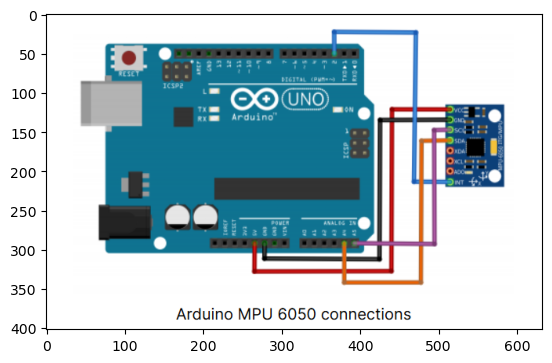

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/Users/Buas/Desktop/Data Start/GitHub/Ano 2/week9_10_2A/BlockB/img.png")
plt.imshow(image)
plt.show()

## **4. Challenges Faced & Solutions**  

During the implementation of this project, several challenges were encountered. Here’s how they were identified and solved:

**Noisy IMU Data** <br>
**Problem:**  
- The raw data from the **MPU6050** was **inconsistent** and **fluctuated rapidly**.  
- This made the 3D model in **Blender appear jittery** instead of smooth.

**Solution:**  <br>
✅ Implemented a **moving average filter** to smooth out noise.  
✅ Used a **window size of 10** for the filter to balance responsiveness and stability.  

**Blender Object Flickering**<br>
**Problem:**  
- The **shape keys in Blender** switched **too quickly**, causing **visual flickering**.  
- The object **rapidly alternated between "moving" and "idle" states**.

**Solution:**  
✅ Introduced a **"SETTLE_FRAMES"** delay.  
✅ The **Blender script waits for multiple consecutive frames** before switching states.  
✅ This prevents **sudden, unnecessary state changes**.

**IMU Communication Issues**<br>
**Problem:**  
- The **MPU6050 sometimes failed to send data** or was **not detected** by the Arduino.

**Solution:**  
✅ **Checked I2C wiring** to ensure **correct SDA/SCL connections**.  
✅ Used an **I2C scanner script** to verify that the **MPU6050 is at address 0x68**.  
✅ Adjusted the **baud rate** for stable serial communication.

**Incorrect Data Interpretation**<br>
**Problem:**  
- The gyroscope **returns raw 16-bit values** that need **scaling**.  
- Some **unexpected rotations** occurred due to **incorrect unit conversion**.

**Solution:**  
✅ Used the **default MPU6050 sensitivity of ±250°/s**, meaning **divided by 131.0**.  
✅ Verified the data by printing **raw vs. processed values**.


## **Conclusion**  

**Key Takeaways**
- The **MPU6050** provides **real-time motion data**.  
- The **Arduino** processes the data and **filters out noise**.  
- The **serial connection** sends smooth rotation data to **Blender**.  
- **Blender updates the object’s rotation** dynamically based on the IMU values.  

**Future Improvements**
- Replace the **moving average filter** with a **Kalman filter** for better noise reduction.   

## **References**
1. [Arduino MPU6050 Guide](https://howtomechatronics.com/tutorials/arduino/arduino-and-mpu6050-accelerometer-and-gyroscope-tutorial/)  
2. [Blender Python API](https://docs.blender.org/api/current/)
3. [Green Screen Spinning Cat Meme | OIIAIOIIIAI Meme](https://www.youtube.com/watch?v=I68Ehtbu84M)